# Other Yields
A short comparison of non-carbon AGB & not CCSNe yields

In [1]:
import vice
import numpy as np

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
vice.yields.sneia.settings["c"]

5.74e-06

In [3]:
import matplotlib.pyplot as plt

In [4]:
import surp

In [5]:
surp.set_yields()

In [6]:
y_c_0 = 2.75e-3
y_c_0

0.00275

In [7]:
?vice.yields.sneia

Type:        module
String form: <module 'vice.yields.sneia' from '/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/yields/sneia/__init__.py'>
File:        ~/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/yields/sneia/__init__.py
Docstring:  
Type Ia Supernovae (SNe Ia) Nucleosynthetic Yield Tools

Calculate IMF-averaged yields and modify yield settings for use in simulations.
This package provides tables from the following nucleosynthetic yield studies:

        - Seitenzahl et al. (2013) [1]_
        - Iwamoto et al. (1999) [2]_
        - Gronow et al. (2021a, b) [3]_ [4]_

Contents
--------
fractional : <function>
        Calculate an IMF-averaged yield for a given element.
single : <function>
        Look up the mass yield of a given element from a single type Ia supernova
        from a specified study.
settings : dataframe
        Stores current settings for these yields.
gronow21 : yield preset
     

In [8]:
?vice.yields.sneia.fractional

Signature:     
vice.yields.sneia.fractional(
    element,
    study='seitenzahl13',
    model='N1',
    n=0.0022,
)
Call signature: vice.yields.sneia.fractional(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction integrated_yield at 0x7f802635ac20>
Docstring:     
Calculate a delay-time distribution integrated fractional nucleosynthetic
yield of a given element from type Ia supernovae.

**Signature**: vice.yields.sneia.fractional(element, study = "seitenzahl13",
model = "N1", n = 2.2e-03)

Parameters
----------
element : ``str`` [case-insensitive]
        The symbol of the element to calculate the yield for.
study : ``str`` [case-sensitive] [default : "seitenzahl13"]
        A keyword denoting which study to adopt SN Ia mass yields from.

        Keywords and their Associated Studies:

                - "seitenzahl13" : Seitenzahl et al. (2013) [1]_
                - "iwamoto99" : Iwamoto et al. (1999), [2]_
                - "gronow21" : Gronow et a

Text(0, 0.5, 'log y_ia / y_total')

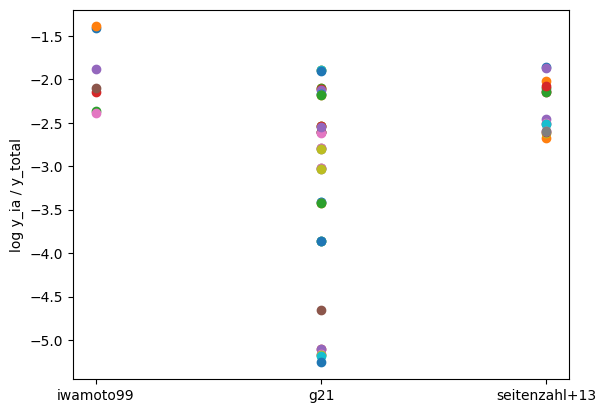

In [9]:

ys = []
labels = []
for model in ['W7', 'W70', 'WDD1', 'WDD2', 'WDD3', 'CDD1', 'CDD2']:
    y = vice.yields.sneia.fractional("c", study="iwamoto99", model=model)
    ys.append(y)
    labels.append("i99." +  model)
    plt.scatter(0, np.log10(y / y_c_0))
    
    
for model in ['M08_03_001', 'M08_03_01', 'M08_03_1', 'M08_03_3', 'M08_05_001', 'M08_05_01', 'M08_05_1', 'M08_05_3', 'M08_10_001', 'M08_10_01', 'M08_10_1', 'M08_10_3', 'M09_03_001', 'M09_03_01', 'M09_03_1', 'M09_03_3', 'M09_05_001', 'M09_05_01', 'M09_05_1', 'M09_05_3', 'M09_10_001', 'M09_10_01', 'M09_10_1', 'M09_10_3', 'M10_02_001', 'M10_02_01', 'M10_02_1', 'M10_02_3', 'M10_03_001', 'M10_03_01', 'M10_03_1', 'M10_03_3', 'M10_05_001', 'M10_05_01', 'M10_05_1', 'M10_05_3', 'M10_10_001', 'M10_10_01', 'M10_10_1', 'M10_10_3', 'M11_05_001', 'M11_05_01', 'M11_05_1', 'M11_05_3']:
    y = vice.yields.sneia.fractional("c", study="gronow21", model=model)
    plt.scatter(1, np.log10(y / y_c_0))
    ys.append(y)
    labels.append("g21." +  model)


for model in ['N1', 'N3', 'N5', 'N10', 'N20', 'N40', 'N100H', 'N100', 'N100L', 'N150', 'N200', 'N300C', 'N1600', 'N1600C', 'N100_Z0.5', 'N100_Z0.1', 'N100_Z0.01']:
    y = vice.yields.sneia.fractional("c", study="seitenzahl13", model=model)
    plt.scatter(2, np.log10(y / y_c_0))
    ys.append(y)
    labels.append("s13." +model)



plt.xticks([0, 1, 2], labels=["iwamoto99", "g21", "seitenzahl+13"])

plt.ylabel("log y_ia / y_total")

In [10]:
np.max(ys) / y_c_0

np.float64(0.040640001248)

In [11]:
np.max(ys) / 1e-4

np.float64(1.1176000343199999)

In [12]:
labels[np.argmax(ys)]

'i99.W70'

In [13]:
np.array(labels)[np.argsort(ys)]

array(['g21.M11_05_3', 'g21.M11_05_1', 'g21.M11_05_001', 'g21.M11_05_01',
       'g21.M10_10_3', 'g21.M10_10_01', 'g21.M10_10_001', 'g21.M10_10_1',
       'g21.M09_10_3', 'g21.M09_10_1', 'g21.M09_10_01', 'g21.M09_10_001',
       'g21.M10_05_3', 'g21.M10_05_1', 'g21.M10_05_01', 'g21.M10_05_001',
       'g21.M08_10_3', 'g21.M08_10_1', 'g21.M08_10_01', 'g21.M08_10_001',
       'g21.M10_03_3', 'g21.M10_03_1', 'g21.M10_03_01', 'g21.M10_03_001',
       's13.N1', 'g21.M09_05_3', 's13.N100', 'g21.M09_05_1',
       'g21.M09_05_01', 's13.N100_Z0.5', 'g21.M09_05_001',
       's13.N100_Z0.1', 's13.N100_Z0.01', 'g21.M10_02_3', 'g21.M10_02_1',
       'g21.M10_02_01', 'g21.M10_02_001', 's13.N100L', 's13.N100H',
       's13.N40', 's13.N10', 'i99.CDD2', 'i99.WDD1', 'g21.M09_03_3',
       'g21.M09_03_1', 'g21.M09_03_01', 'g21.M09_03_001', 's13.N300C',
       'i99.WDD2', 's13.N5', 's13.N20', 'g21.M08_05_3', 'g21.M08_05_1',
       'g21.M08_05_01', 'g21.M08_05_001', 's13.N3', 'i99.CDD1',
       's13.N1600'

In [14]:
np.sort(ys) / y_c_0

array([5.50465523e-06, 6.55272403e-06, 6.68081056e-06, 6.71280264e-06,
       6.91492088e-06, 7.77937008e-06, 7.88338600e-06, 2.19230993e-05,
       1.36001258e-04, 1.36881358e-04, 1.38561509e-04, 1.39361517e-04,
       3.75760713e-04, 3.81120257e-04, 3.86000246e-04, 3.87680253e-04,
       9.25600671e-04, 9.35200136e-04, 9.49600109e-04, 9.50400113e-04,
       1.56400955e-03, 1.59280159e-03, 1.60640087e-03, 1.60880094e-03,
       2.08801472e-03, 2.40722538e-03, 2.43201392e-03, 2.45040423e-03,
       2.47680228e-03, 2.48000678e-03, 2.48560244e-03, 2.52000153e-03,
       2.52800022e-03, 2.84007844e-03, 2.89602214e-03, 2.92801364e-03,
       2.92801444e-03, 3.08001736e-03, 3.09601824e-03, 3.12001744e-03,
       3.54402056e-03, 4.06433280e-03, 4.33640480e-03, 6.52827018e-03,
       6.68008146e-03, 6.76005030e-03, 6.76805286e-03, 7.08803960e-03,
       7.19226400e-03, 7.24004040e-03, 7.36003616e-03, 7.61634909e-03,
       7.81609793e-03, 7.90405961e-03, 7.91206249e-03, 7.92004920e-03,
      

In [15]:
np.sort(ys) / 1e-4

array([1.51378019e-04, 1.80199911e-04, 1.83722290e-04, 1.84602073e-04,
       1.90160324e-04, 2.13932677e-04, 2.16793115e-04, 6.02885230e-04,
       3.74003459e-03, 3.76423733e-03, 3.81044149e-03, 3.83244171e-03,
       1.03334196e-02, 1.04808071e-02, 1.06150068e-02, 1.06612070e-02,
       2.54540184e-02, 2.57180037e-02, 2.61140030e-02, 2.61360031e-02,
       4.30102627e-02, 4.38020438e-02, 4.41760240e-02, 4.42420257e-02,
       5.74204048e-02, 6.61986978e-02, 6.68803828e-02, 6.73861164e-02,
       6.81120628e-02, 6.82001863e-02, 6.83540670e-02, 6.93000420e-02,
       6.95200060e-02, 7.81021570e-02, 7.96406089e-02, 8.05203751e-02,
       8.05203971e-02, 8.47004774e-02, 8.51405016e-02, 8.58004796e-02,
       9.74605654e-02, 1.11769152e-01, 1.19251132e-01, 1.79527430e-01,
       1.83702240e-01, 1.85901383e-01, 1.86121454e-01, 1.94921089e-01,
       1.97787260e-01, 1.99101111e-01, 2.02400994e-01, 2.09449600e-01,
       2.14942693e-01, 2.17361639e-01, 2.17581719e-01, 2.17801353e-01,
      

In [16]:
np.sort(ys)

array([1.51378019e-08, 1.80199911e-08, 1.83722290e-08, 1.84602073e-08,
       1.90160324e-08, 2.13932677e-08, 2.16793115e-08, 6.02885230e-08,
       3.74003459e-07, 3.76423733e-07, 3.81044149e-07, 3.83244171e-07,
       1.03334196e-06, 1.04808071e-06, 1.06150068e-06, 1.06612070e-06,
       2.54540184e-06, 2.57180037e-06, 2.61140030e-06, 2.61360031e-06,
       4.30102627e-06, 4.38020438e-06, 4.41760240e-06, 4.42420257e-06,
       5.74204048e-06, 6.61986978e-06, 6.68803828e-06, 6.73861164e-06,
       6.81120628e-06, 6.82001863e-06, 6.83540670e-06, 6.93000420e-06,
       6.95200060e-06, 7.81021570e-06, 7.96406089e-06, 8.05203751e-06,
       8.05203971e-06, 8.47004774e-06, 8.51405016e-06, 8.58004796e-06,
       9.74605654e-06, 1.11769152e-05, 1.19251132e-05, 1.79527430e-05,
       1.83702240e-05, 1.85901383e-05, 1.86121454e-05, 1.94921089e-05,
       1.97787260e-05, 1.99101111e-05, 2.02400994e-05, 2.09449600e-05,
       2.14942693e-05, 2.17361639e-05, 2.17581719e-05, 2.17801353e-05,
      

# Nitrogen AGB

In [17]:

def plot_n_table(study = "cristallo11", ax=None, fig=None, factor=1e2, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()

    y1, m1, z1 = vice.yields.agb.grid('n', study=study)
    N = len(z1)

    for i in range(N):
        y = np.array(y1)[:,i] * factor
        z = z1[i] 
        c = hmap(np.log10(z/0.014))
        f = ax.plot(m1, y, "o", label=f"Z = {z}", c=(c), **kwargs)
        f = ax.plot(m1, y, label=f"Z = {z}", c=(c), **kwargs)
        # ax.set_xticks(np.arange(1, 8))
    
    ax.axhline(0, color="k", ls=":", zorder=-1)

    return f

NameError: name 'hmap' is not defined

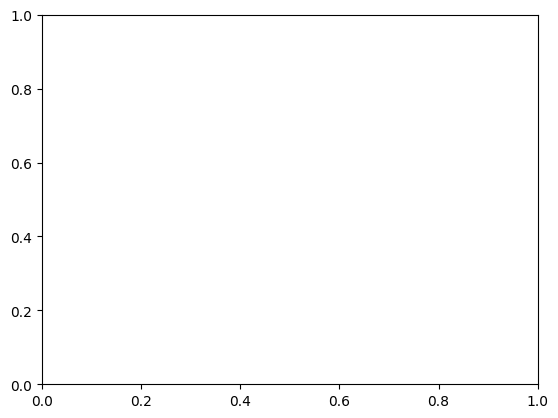

In [19]:
plot_n_table("pignatari16")
plt.xlabel("M/Msun")
plt.ylabel(r"$y_{\rm N}$ --- R18")

In [ ]:
yields.set_yields()
Z = MH_to_Z(np.linspace(-2, 1))

plot_y_z(Z, ele="n", label="linear");

y_agb["n"] = "pignatari16"

plot_y_z(Z, ele="n", label="P16");
plt.xlabel("[M/H]")
plt.ylabel("y_N")

plt.legend()
plt.savefig("figures/_y_n_z.pdf")

In [ ]:
plot_yield_table("pignatari16", ele="n", fmt="o-")
